## CODING QUESTIONS

#### 1) Compute matching SIFT keypoints from a stereo image pair.

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load stereo images

imgL = cv2.imread("img0.png")
imgR = cv2.imread("img1.png")

#create sift object
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2)

# find keypoints and descriptors
kpL, desL = sift.detectAndCompute(imgL, None)
kpR, desR = sift.detectAndCompute(imgR, None)

#### 2) Compute and display the epipolar lines for both images.

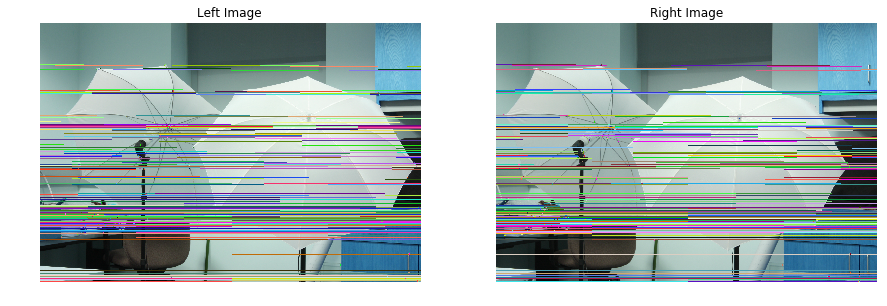

In [6]:
def getPointOnLine(line, x):
    a, b, c = line
    return (x, int(round(-(a*x+c)/b)))


def drawLines(img1, img2, lines, pts1, pts2):
    h, w, _ = img1.shape
    img1 = img1.copy()
    img2 = img2.copy()

    # For each line (ax+by+c=0)
    for line, pt1, pt2 in zip(lines, pts1, pts2):
        # Start and end points
        x0, y0 = getPointOnLine(line, 0)
        x1, y1 = getPointOnLine(line, w)

        # Draw the lines and the points
        color = tuple(np.random.randint(0, 255, 3).tolist())
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 2)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
        
    return img1, img2

# Find the 2 best keypoint matches per descriptor for the image-pair
matches = cv2.BFMatcher(cv2.NORM_L2).knnMatch(desL, desR, k=2)

# Ratio test to store the best matches from both images
pts_l, pts_r = [], []
pts_l_bad, pts_r_bad = [], []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        pts_l.append(kpL[m.queryIdx].pt)
        pts_r.append(kpR[m.trainIdx].pt)
    else:
        pts_l_bad.append(kpL[m.queryIdx].pt)
        pts_r_bad.append(kpR[m.trainIdx].pt)

pts_l = np.int32(pts_l)
pts_r = np.int32(pts_r)
pts_l_bad = np.int32(pts_l_bad)
pts_r_bad = np.int32(pts_r_bad)

# Find the Fundamental Matrix
fm, mask = cv2.findFundamentalMat(pts_l, pts_r, cv2.FM_LMEDS)

# Use only inliers for remaining computations
pts_l = pts_l[mask.ravel() == 1]
pts_r = pts_r[mask.ravel() == 1]

# Epilines corresponding to points in the first image is drawn on the second image
lines_left = cv2.computeCorrespondEpilines(pts_r, 2, fm).reshape(-1, 3)
img_left_lines_1, img_right_lines_1 = drawLines(imgL, imgR, lines_left, pts_l, pts_r)

# Epilines corresponding to points in the first image is drawn on the second image
lines_right = cv2.computeCorrespondEpilines(pts_l, 1, fm).reshape(-1, 3)
img_right_lines_2, img_left_lines_2 = drawLines(imgR, imgL, lines_right, pts_r, pts_l)

# Display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_left_lines_1), plt.title('Left Image'), plt.axis('off')
plt.subplot(122), plt.imshow(img_right_lines_2), plt.title('Right Image'), plt.axis('off')

plt.show()

#### 3) Pick any one keypoint in the right image which doesn't have a correct match in the left image, and is not on the corresponding epipolar line. Extract a patch of size 5x5 around this keypoint in the right image. 

#### 4) Match the extracted patch using the sum of squared difference with every patch along the corresponding epipolar line in the left image. 

#### 5) Plot SSD values. Find the matching point with minimum SSD value. Display found matching points in both the images.

## REASONING QUESTIONS

#### 6) Did you find exactly one matching point with lowest SSD or multiple? Is the found matching point the correct one? Explain why.

#### 7) Suppose you found multiple matches in the previous question. What constraint(s) could be imposed on the matching algorithm to find a single match?

#### 8) Suppose you found exactly one match with the lowest SSD, but it is the incorrect one. What constraint(s) could be imposed to find a correct match?